In [1]:
import numpy as np

from experiment_utils import run_experiment_with_coordinate_masking, prepare_sift, plot_chosen_results


In [2]:
masked_coord_counts = [32, 48, 64, 80, 96]

In [3]:
prepare_sift(masked_coord_counts, True, recalc=False)

Prepare sift data
compute test scores for models with masked coordinates


In [3]:
results_recall_5 = run_experiment_with_coordinate_masking(
    "sift", 128, masked_coord_counts, recall_top_len=5,
    n_search_threads=4, recalc_graphs=False, recalc_search=False, verbose=True
)

In [4]:
results_recall_1 = run_experiment_with_coordinate_masking(
    "sift", 128, masked_coord_counts, recall_top_len=1,
    n_search_threads=4, recalc_graphs=False, recalc_search=False, verbose=True
)

In [5]:
print(results_recall_5.keys())

dict_keys(['rpg', 'hnsw', '32_masked_coords+rerank', '48_masked_coords+rerank', '64_masked_coords+rerank', '80_masked_coords+rerank', '96_masked_coords+rerank', 'rpg_unifrom_train'])


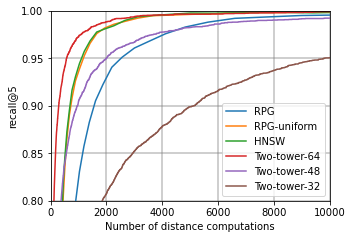

In [13]:
plot_chosen_results(
    results_recall_5, keys=[
        "rpg",
        "rpg_unifrom_train",
        "hnsw",
        '64_masked_coords+rerank',
        '80_masked_coords+rerank',
        '96_masked_coords+rerank'
    ],
    xlim=(0, 10000), ylim=(0.8, 1),
    hlines=np.linspace(0.8, 1, 5),
    vlines=np.linspace(0, 10000, 6),
    ylabel="recall@5",
    figsize=(5, 3.5),
    relabeling={
        "rpg": "RPG",
        "hnsw": "HNSW",
        "rpg_unifrom_train": "RPG-uniform",
        '64_masked_coords+rerank': "Two-tower-64",
        '80_masked_coords+rerank': "Two-tower-48",
        '96_masked_coords+rerank': "Two-tower-32"
    },
    file_name="pic/sift_128.pdf",
    dpi=300
)

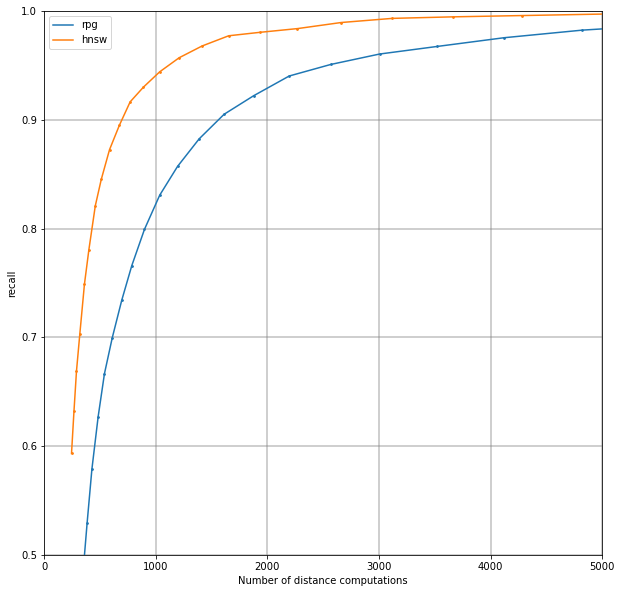

In [10]:
plot_chosen_results(
    results_recall_5, keys=[
        "rpg",
        "hnsw",
#         "rpg_unifrom_train",
#         '64_masked_coords+rerank',
#         '80_masked_coords+rerank',
#         '96_masked_coords+rerank'
    ],
    xlim=(0, 5000), ylim=(0.5, 1),
    hlines=np.linspace(0.5, 1, 6),
    vlines=np.linspace(0, 5000, 6),
#     x_log_scale=True
)

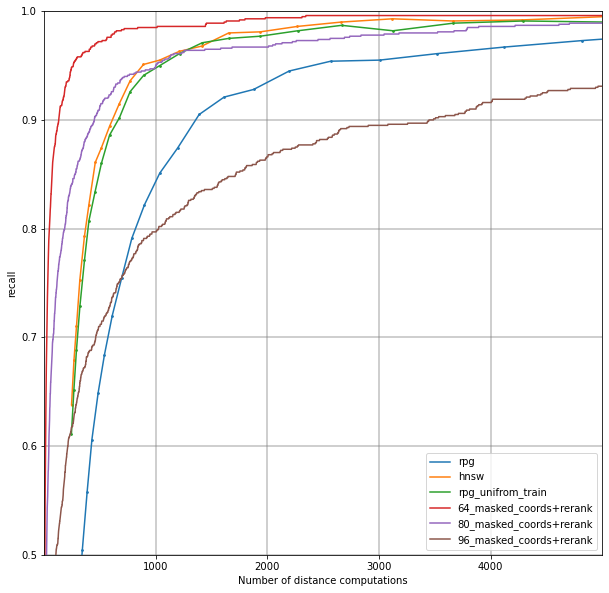

In [8]:
plot_chosen_results(
    results_recall_1, keys=[
        "rpg", "hnsw", "rpg_unifrom_train",
        '64_masked_coords+rerank',
        '80_masked_coords+rerank',
        '96_masked_coords+rerank'
    ],
    xlim=(0, 5000), ylim=(0.5, 1),
    hlines=np.linspace(0.5, 1, 6),
    vlines=np.linspace(1000, 4000, 4)
)